## mobile data Web scraping from flipkart 

In [8]:
import csv
from bs4 import BeautifulSoup
import pandas as pd
import requests
import matplotlib as plot
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.express as px
from matplotlib.pyplot import figure
import warnings
warnings.simplefilter(action='ignore')

In [60]:
company,Model,price,Star,warranty,Rating,Review,Ram,storage,expandable,display,camera,battery,processor,warranty=[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]



page_number= input("enter the number of page: ")
for i in range(1,int(page_number)+1):
    url = 'https://www.flipkart.com/search?q=mobile+phones&as=on&as-show=on&otracker=AS_Query_HistoryAutoSuggest_1_4_na_na_na&otracker1=AS_Query_HistoryAutoSuggest_1_4_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=mobile+phones&requestId=e625b409-ca2a-456a-b53c-0fdb7618b658&as-backfill=on&page='+str(i)
    req = requests.get(url)
    soup = BeautifulSoup(req.content, 'html.parser')
    mobile_name = soup.find_all('div',{'class':"_4rR01T"})
    moblie_star = soup.find_all('div',{'class':"_3LWZlK"})
    # Extracting price of the model from the 1st card
    mobile_price = soup.find_all('div',{'class':'_30jeq3 _1_WHN1'})
#     num_ratings = soup.find('span',{'class':"_2_R_DZ"}).text.replace('\xa0&\xa0'," ; ")[0:item.find('span',{'class':"_2_R_DZ"}).text.replace('\xa0&\xa0'," ; ").find(';')].replace('Ratings',"").replace('Rating',"").strip()
    num_ratings = soup.find('span',{'class':"_2_R_DZ"}).text.replace('\xa0&\xa0'," ; ")[0:soup.find('span',{'class':"_2_R_DZ"}).text.replace('\xa0&\xa0'," ; ").find(';')].replace('Ratings',"").replace('Rating',"").strip()
    num_reviews = soup.find('span',{'class':"_2_R_DZ"}).text.replace('\xa0&\xa0'," ; ")[soup.find('span',{'class':"_2_R_DZ"}).text.replace('\xa0&\xa0'," ; ").find(';')+1:].replace('Reviews',"").strip()
    mobile_ram = soup.find('li',{'class':"rgWa7D"}).text[0:soup.find('li',{'class':"rgWa7D"}).text.find('|')].replace('GB RAM',"")
    # Extracting Storage/ROM from 1st card
    mobile_storage = soup.find('li',{'class':"rgWa7D"}).text[soup.find('li',{'class':"rgWa7D"}).text.find('|')+1:][0:10].replace('GB RO',"").strip()
    # Extracting whether there is an option of expanding the storage or not
    mobile_expandable = soup.find('li',{'class':"rgWa7D"}).text[soup.find('li',{'class':"rgWa7D"}).text.find('|')+1:][13:].replace('Expandable Upto ','')
    # Extracting the display option from the 1st card
    mobile_display = soup.find_all('li')[1].text.replace('Full HD+ Display',"").strip()
    # Extracting camera options from the 1st card
    mobile_camera = soup.find_all('li')[2].text.strip()
    # Extracting the battery option from the 1st card
    mobile_battery = soup.find_all('li')[3].text
    # Extracting the processir option from the 1st card
    moblie_processor = soup.find_all('li')[4].text.strip()
    # Extracting Warranty from the 1st card
    mobile_warranty = soup.find_all('li',{'class':"rgWa7D"})[-1].text.strip()

#     print(len(mobile_name))
    for i in mobile_name:
        Model.append(i.text)
        company.append(i.text.split(' ')[0])
    for i in mobile_price:
        price.append(i.text)
    for i in moblie_star:
        Star.append(i.text)
    for i in mobile_display:
        display.append(mobile_display)
    for i in range(len(mobile_name)):
        Rating.append(num_ratings)
        Review.append(num_reviews)
        Ram.append(mobile_ram) 
        storage.append(mobile_storage) 
        expandable.append(mobile_expandable)
        camera.append(mobile_camera)
        battery.append(mobile_battery)
        processor.append(moblie_processor)
        warranty.append(mobile_warranty)


df = pd.DataFrame(list(zip(company,Model, Star,Rating,Review,Ram,storage,expandable,display,camera,battery,processor,warranty,price)),
               columns =['company_name','model',"star","num_ratings"
   ,"reviews",'ram',"storage","expandable","display","camera","battery","processor","warranty","price"])


    

enter the number of page: 41


#### there are only 41 page which has data in flipkart

In [100]:
df

,company_name,model,star,num_ratings,reviews,ram,storage,expandable,display,camera,battery,processor,warranty,price
0,OPPO,"OPPO K10 (Blue Flame, 128 GB)",4.4,"73,145","5,459",6,128,1 TB,16.74 cm (6.59 inch),50MP + 2MP + 2MP | 16MP Front Camera,5000 mAh Lithium Ion Battery,Qualcomm Snapdragon 680 Processor,1 Year Manufacturer Warranty for Phone and 6 M...,"₹14,990"
1,OPPO,"OPPO K10 (Black Carbon, 128 GB)",4.4,"73,145","5,459",6,128,1 TB,16.74 cm (6.59 inch),50MP + 2MP + 2MP | 16MP Front Camera,5000 mAh Lithium Ion Battery,Qualcomm Snapdragon 680 Processor,1 Year Manufacturer Warranty for Phone and 6 M...,"₹14,990"
2,SAMSUNG,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)",4.4,"73,145","5,459",6,128,1 TB,16.74 cm (6.59 inch),50MP + 2MP + 2MP | 16MP Front Camera,5000 mAh Lithium Ion Battery,Qualcomm Snapdragon 680 Processor,1 Year Manufacturer Warranty for Phone and 6 M...,"₹11,999"
3,SAMSUNG,"SAMSUNG Galaxy F13 (Nightsky Green, 64 GB)",4.4,"73,145","5,459",6,128,1 TB,16.74 cm (6.59 inch),50MP + 2MP + 2MP | 16MP Front Camera,5000 mAh Lithium Ion Battery,Qualcomm Snapdragon 680 Processor,1 Year Manufacturer Warranty for Phone and 6 M...,"₹11,999"
4,SAMSUNG,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.4,"73,145","5,459",6,128,1 TB,16.74 cm (6.59 inch),50MP + 2MP + 2MP | 16MP Front Camera,5000 mAh Lithium Ion Battery,Qualcomm Snapdragon 680 Processor,1 Year Manufacturer Warranty for Phone and 6 M...,"₹11,999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,OPPO,"OPPO Reno7 5G (Starry Black, 256 GB)",5,"1,159",219,8,128,,1.68 cm (0.66 inch) Display,50MP + 13MP + 2MP | 32MP Front Camera,4400 mAh Lithium Battery,Qualcomm Snapdragon 888 + Processor,1 Year Warranty for Phone and 6 Months Warrant...,"₹28,999"
980,APPLE,"APPLE iPhone 14 ((PRODUCT)RED, 256 GB)",2,"1,159",219,8,128,,1.68 cm (0.66 inch) Display,50MP + 13MP + 2MP | 32MP Front Camera,4400 mAh Lithium Battery,Qualcomm Snapdragon 888 + Processor,1 Year Warranty for Phone and 6 Months Warrant...,"₹89,900"
981,REDMI,"REDMI 9 Prime (Sunrise Flare, 64 GB)",4.1,"1,159",219,8,128,,1.68 cm (0.66 inch) Display,50MP + 13MP + 2MP | 32MP Front Camera,4400 mAh Lithium Battery,Qualcomm Snapdragon 888 + Processor,1 Year Warranty for Phone and 6 Months Warrant...,"₹11,490"
982,realme,"realme C25Y (Metal Grey, 128 GB)",5,"1,159",219,8,128,,1.68 cm (0.66 inch) Display,50MP + 13MP + 2MP | 32MP Front Camera,4400 mAh Lithium Battery,Qualcomm Snapdragon 888 + Processor,1 Year Warranty for Phone and 6 Months Warrant...,"₹12,199"


## Load data 

In [61]:
df.to_csv('flipkart_mobile_data.csv',index=False)

## data analysis of flipkart data

In [9]:
data = pd.read_csv('flipkart_mobile_data.csv')

In [10]:
data

,company_name,model,star,num_ratings,reviews,ram,storage,expandable,display,camera,battery,processor,warranty,price
0,OPPO,"OPPO K10 (Blue Flame, 128 GB)",4.4,73145,5459,6,128,1 TB,16.74 cm (6.59 inch),50MP + 2MP + 2MP | 16MP Front Camera,5000 mAh Lithium Ion Battery,Qualcomm Snapdragon 680 Processor,1 Year on Handset And 6 Months on Accessories,14990
1,OPPO,"OPPO K10 (Black Carbon, 128 GB)",4.4,73145,5459,6,128,1 TB,16.74 cm (6.59 inch),50MP + 2MP + 2MP | 16MP Front Camera,5000 mAh Lithium Ion Battery,Qualcomm Snapdragon 680 Processor,1 Year on Handset And 6 Months on Accessories,14990
2,SAMSUNG,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)",4.4,73145,5459,6,128,1 TB,16.74 cm (6.59 inch),50MP + 2MP + 2MP | 16MP Front Camera,5000 mAh Lithium Ion Battery,Qualcomm Snapdragon 680 Processor,1 Year on Handset And 6 Months on Accessories,11999
3,CAT,"CAT S62 Pro (Black, 128 GB)",4.4,73145,5459,6,128,1 TB,16.74 cm (6.59 inch),50MP + 2MP + 2MP | 16MP Front Camera,5000 mAh Lithium Ion Battery,Qualcomm Snapdragon 680 Processor,1 Year on Handset And 6 Months on Accessories,79900
4,SAMSUNG,"SAMSUNG Galaxy F13 (Nightsky Green, 64 GB)",4.4,73145,5459,6,128,1 TB,16.74 cm (6.59 inch),50MP + 2MP + 2MP | 16MP Front Camera,5000 mAh Lithium Ion Battery,Qualcomm Snapdragon 680 Processor,1 Year on Handset And 6 Months on Accessories,11999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,IQOO,"IQOO Z6 5G (Dynamo Black, 128 GB)",4.0,13149,1154,6,128,256 GB,14.48 cm (5.7 inch),12MP Rear Camera,4000 mAh Battery,"QualcSnapdragon 660, 2.0GHz octa-core processo...",1 Year on Handset and 6 Months on Accessories,17499
980,LAVA,LAVA A1 Super 2021,4.1,13149,1154,6,128,256 GB,14.48 cm (5.7 inch),12MP Rear Camera,4000 mAh Battery,"QualcSnapdragon 660, 2.0GHz octa-core processo...",1 Year on Handset and 6 Months on Accessories,1199
981,SAMSUNG,"SAMSUNG Galaxy A12 (Blue, 64 GB)",3.9,13149,1154,6,128,256 GB,14.48 cm (5.7 inch),12MP Rear Camera,4000 mAh Battery,"QualcSnapdragon 660, 2.0GHz octa-core processo...",1 Year on Handset and 6 Months on Accessories,12999
982,Good,Good One FLIP,4.5,13149,1154,6,128,256 GB,14.48 cm (5.7 inch),12MP Rear Camera,4000 mAh Battery,"QualcSnapdragon 660, 2.0GHz octa-core processo...",1 Year on Handset and 6 Months on Accessories,1399


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  984 non-null    object 
 1   model         984 non-null    object 
 2   star          984 non-null    float64
 3   num_ratings   984 non-null    int64  
 4   reviews       984 non-null    int64  
 5   ram           984 non-null    object 
 6   storage       984 non-null    object 
 7   expandable    816 non-null    object 
 8   display       984 non-null    object 
 9   camera        984 non-null    object 
 10  battery       984 non-null    object 
 11  processor     984 non-null    object 
 12  warranty      984 non-null    object 
 13  price         984 non-null    int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 107.8+ KB


In [12]:
data.describe()

,star,num_ratings,reviews,price
count,984.000000,984.000000,984.000000,984.000000
mean,4.141260,24051.317073,1788.219512,14062.773374
std,0.694803,33617.702080,2354.853227,17864.001378
min,1.000000,28.000000,2.000000,749.000000
25%,4.000000,2346.000000,196.000000,1440.500000
50%,4.200000,13149.000000,1154.000000,9999.000000
75%,4.400000,20848.000000,2163.000000,16999.000000
max,5.000000,122847.000000,9943.000000,149900.000000


In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
star,984.0,4.141260,0.694803,1.0,4.0,4.2,4.4,5.0
num_ratings,984.0,24051.317073,33617.702080,28.0,2346.0,13149.0,20848.0,122847.0
reviews,984.0,1788.219512,2354.853227,2.0,196.0,1154.0,2163.0,9943.0
price,984.0,14062.773374,17864.001378,749.0,1440.5,9999.0,16999.0,149900.0


In [14]:
data.nunique()

company_name     47
model           603
star             17
num_ratings      32
reviews          32
ram               9
storage           8
expandable        8
display          21
camera           24
battery          25
processor        30
warranty         33
price           335
dtype: int64

In [15]:
data.columns

Index(['company_name', 'model', 'star', 'num_ratings', 'reviews', 'ram',
       'storage', 'expandable', 'display', 'camera', 'battery', 'processor',
       'warranty', 'price'],
      dtype='object')

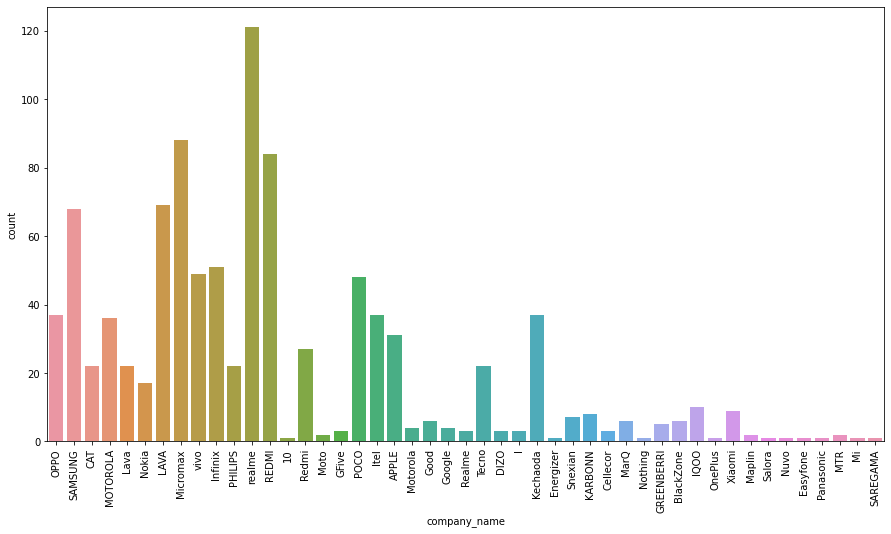

In [16]:
fig, ax = plt.subplots(figsize=(15,8))
plt.xticks(rotation=90)
ax=sns.countplot(x="company_name", data=data)

In [17]:
data["storage"] = data["storage"].replace('MB RO','')

In [18]:
data

,company_name,model,star,num_ratings,reviews,ram,storage,expandable,display,camera,battery,processor,warranty,price
0,OPPO,"OPPO K10 (Blue Flame, 128 GB)",4.4,73145,5459,6,128,1 TB,16.74 cm (6.59 inch),50MP + 2MP + 2MP | 16MP Front Camera,5000 mAh Lithium Ion Battery,Qualcomm Snapdragon 680 Processor,1 Year on Handset And 6 Months on Accessories,14990
1,OPPO,"OPPO K10 (Black Carbon, 128 GB)",4.4,73145,5459,6,128,1 TB,16.74 cm (6.59 inch),50MP + 2MP + 2MP | 16MP Front Camera,5000 mAh Lithium Ion Battery,Qualcomm Snapdragon 680 Processor,1 Year on Handset And 6 Months on Accessories,14990
2,SAMSUNG,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)",4.4,73145,5459,6,128,1 TB,16.74 cm (6.59 inch),50MP + 2MP + 2MP | 16MP Front Camera,5000 mAh Lithium Ion Battery,Qualcomm Snapdragon 680 Processor,1 Year on Handset And 6 Months on Accessories,11999
3,CAT,"CAT S62 Pro (Black, 128 GB)",4.4,73145,5459,6,128,1 TB,16.74 cm (6.59 inch),50MP + 2MP + 2MP | 16MP Front Camera,5000 mAh Lithium Ion Battery,Qualcomm Snapdragon 680 Processor,1 Year on Handset And 6 Months on Accessories,79900
4,SAMSUNG,"SAMSUNG Galaxy F13 (Nightsky Green, 64 GB)",4.4,73145,5459,6,128,1 TB,16.74 cm (6.59 inch),50MP + 2MP + 2MP | 16MP Front Camera,5000 mAh Lithium Ion Battery,Qualcomm Snapdragon 680 Processor,1 Year on Handset And 6 Months on Accessories,11999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,IQOO,"IQOO Z6 5G (Dynamo Black, 128 GB)",4.0,13149,1154,6,128,256 GB,14.48 cm (5.7 inch),12MP Rear Camera,4000 mAh Battery,"QualcSnapdragon 660, 2.0GHz octa-core processo...",1 Year on Handset and 6 Months on Accessories,17499
980,LAVA,LAVA A1 Super 2021,4.1,13149,1154,6,128,256 GB,14.48 cm (5.7 inch),12MP Rear Camera,4000 mAh Battery,"QualcSnapdragon 660, 2.0GHz octa-core processo...",1 Year on Handset and 6 Months on Accessories,1199
981,SAMSUNG,"SAMSUNG Galaxy A12 (Blue, 64 GB)",3.9,13149,1154,6,128,256 GB,14.48 cm (5.7 inch),12MP Rear Camera,4000 mAh Battery,"QualcSnapdragon 660, 2.0GHz octa-core processo...",1 Year on Handset and 6 Months on Accessories,12999
982,Good,Good One FLIP,4.5,13149,1154,6,128,256 GB,14.48 cm (5.7 inch),12MP Rear Camera,4000 mAh Battery,"QualcSnapdragon 660, 2.0GHz octa-core processo...",1 Year on Handset and 6 Months on Accessories,1399


<AxesSubplot: xlabel='company_name', ylabel='Count'>

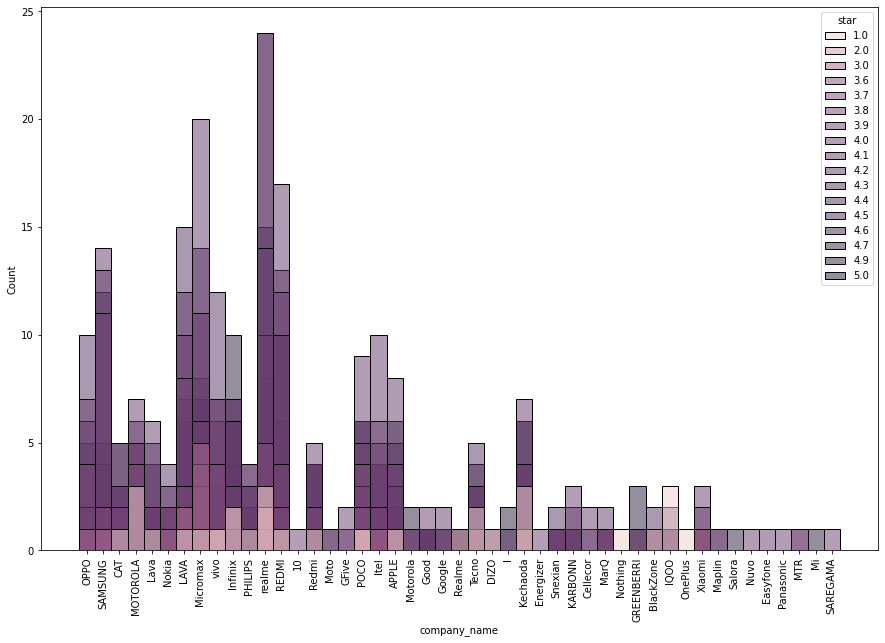

In [19]:
fig, ax = plt.subplots(figsize=(15,10))
plt.xticks(rotation=90)
sns.histplot(data=data, x="company_name", hue="star")

<AxesSubplot: xlabel='star', ylabel='Count'>

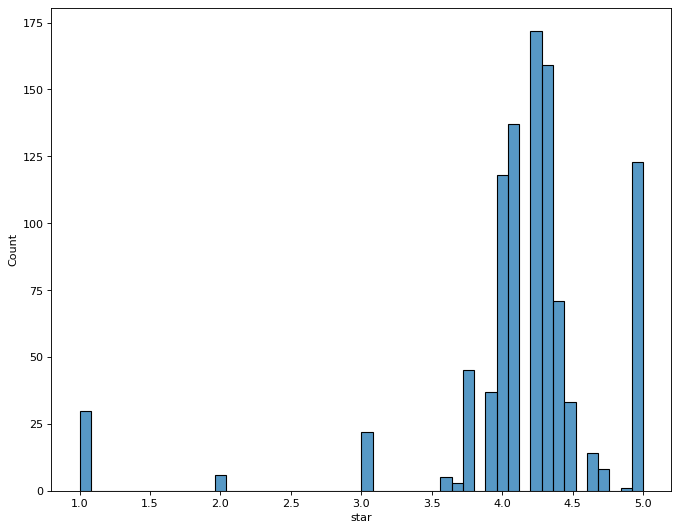

In [20]:
import seaborn as sns
figure(figsize=(10, 8), dpi=80)
sns.histplot(data['star'])

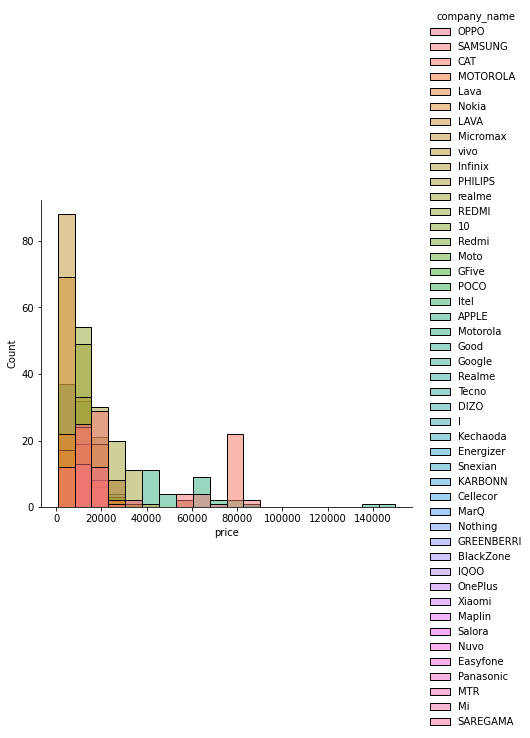

In [21]:
sns.displot(data, x='price',bins=20, hue='company_name',aspect=1.2)

In [22]:
data.duplicated().value_counts()

False    979
True       5
dtype: int64

In [23]:
data.isnull().sum()

company_name      0
model             0
star              0
num_ratings       0
reviews           0
ram               0
storage           0
expandable      168
display           0
camera            0
battery           0
processor         0
warranty          0
price             0
dtype: int64

In [24]:
for i in data.columns:
    if data[i].dtypes == 'object':
        data[i].fillna(data[i].mode()[0], inplace=True)
    else:
        data[i].fillna(data[i].median(), inplace=True)
print(data)

    company_name                                       model  star  \
0           OPPO               OPPO K10 (Blue Flame, 128 GB)   4.4   
1           OPPO             OPPO K10 (Black Carbon, 128 GB)   4.4   
2        SAMSUNG  SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)   4.4   
3            CAT                 CAT S62 Pro (Black, 128 GB)   4.4   
4        SAMSUNG  SAMSUNG Galaxy F13 (Nightsky Green, 64 GB)   4.4   
..           ...                                         ...   ...   
979         IQOO           IQOO Z6 5G (Dynamo Black, 128 GB)   4.0   
980         LAVA                          LAVA A1 Super 2021   4.1   
981      SAMSUNG            SAMSUNG Galaxy A12 (Blue, 64 GB)   3.9   
982         Good                               Good One FLIP   4.5   
983      Infinix        Infinix Note 11s (Haze Green, 64 GB)   4.5   

     num_ratings  reviews ram storage expandable               display  \
0          73145     5459   6     128       1 TB  16.74 cm (6.59 inch)   
1          

In [25]:
data.isnull().sum()

company_name    0
model           0
star            0
num_ratings     0
reviews         0
ram             0
storage         0
expandable      0
display         0
camera          0
battery         0
processor       0
warranty        0
price           0
dtype: int64

In [26]:
top_rated_ten_phones = data.sort_values(by=["star"], ascending=False)[:10]
top_rated_ten_phones

,company_name,model,star,num_ratings,reviews,ram,storage,expandable,display,camera,battery,processor,warranty,price
563,GREENBERRI,GREENBERRI F1,5.0,45092,2163,4,64 M,256 GB,16.51 cm (6.5 inch) HD+ Display,50MP + 2MP + 2MP | 8MP Front Camera,5000 mAh LiPo Battery,Unisoc T618 Processor,12 + 1 Month Warranty,1399
515,vivo,"vivo Y15c (Mystic Blue, 32 GB)",5.0,743,26,512 MB RAM,256 MB RO,256 GB,4.57 cm (1.8 inch) Display,0.3MP Rear Camera,1000 mAh Battery,3 Month FOR HANDSET,"100 Days Replacement Warranty, 1 year warranty...",9874
556,CAT,"CAT S62 Pro (Black, 128 GB)",5.0,45092,2163,4,64 M,256 GB,3.66 cm (1.44 inch) QVGA Display,50MP + 2MP + 2MP | 8MP Front Camera,5000 mAh LiPo Battery,Unisoc T618 Processor,12 + 1 Month Warranty,79900
117,MOTOROLA,"MOTOROLA G40 Fusion (Frosted Champagne, 128 GB)",5.0,13149,1154,6,128,256 GB,6.1 cm (2.4 inch) Display,12MP Rear Camera,4000 mAh Battery,"QualcSnapdragon 660, 2.0GHz octa-core processo...",1 Year Warranty for Phone and 6 Months Warrant...,13499
553,realme,"realme C25_Y (Metal Grey, 64 GB)",5.0,45092,2163,4,64 M,256 GB,3.66 cm (1.44 inch) QVGA Display,50MP + 2MP + 2MP | 8MP Front Camera,5000 mAh LiPo Battery,Unisoc T618 Processor,12 + 1 Month Warranty,11179
525,LAVA,LAVA A1 2021,5.0,743,26,512 MB RAM,256 MB RO,256 GB,4.57 cm (1.8 inch) Display,0.3MP Rear Camera,1000 mAh Battery,3 Month FOR HANDSET,"100 Days Replacement Warranty, 1 year warranty...",1129
524,Kechaoda,Kechaoda K115,5.0,743,26,512 MB RAM,256 MB RO,256 GB,4.57 cm (1.8 inch) Display,0.3MP Rear Camera,1000 mAh Battery,3 Month FOR HANDSET,"100 Days Replacement Warranty, 1 year warranty...",1149
518,Tecno,"Tecno Pop 6 Pro (Polar Black, 32 GB)",5.0,743,26,512 MB RAM,256 MB RO,256 GB,4.57 cm (1.8 inch) Display,0.3MP Rear Camera,1000 mAh Battery,3 Month FOR HANDSET,"100 Days Replacement Warranty, 1 year warranty...",6777
516,Micromax,Micromax X513+,5.0,743,26,512 MB RAM,256 MB RO,256 GB,4.57 cm (1.8 inch) Display,0.3MP Rear Camera,1000 mAh Battery,3 Month FOR HANDSET,"100 Days Replacement Warranty, 1 year warranty...",1298
487,LAVA,LAVA A1 2021,5.0,13149,1154,6,128,256 GB,14.48 cm (5.7 inch),12MP Rear Camera,4000 mAh Battery,"QualcSnapdragon 660, 2.0GHz octa-core processo...","One Year Warranty for Handset, 6 Months for Ac...",1223


---------------------------------------------------------------------------------------------------------------------------

# Q1

### Identify Product that customers want to buy, as demonstrated by their post-buying rating.

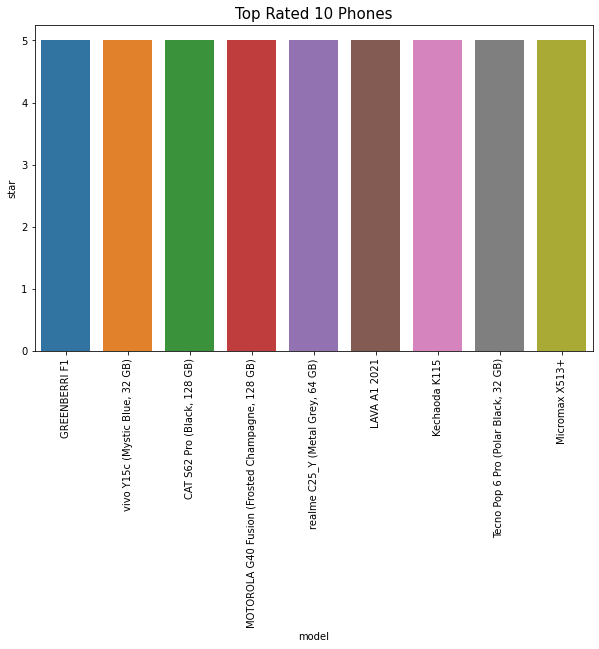

In [27]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.barplot(x=top_rated_ten_phones.model, y=data.star)
plt.title("Top Rated 10 Phones", size=15)
plt.show()

In [28]:
print(data.groupby(["model","company_name"]).mean())

                                                    star  num_ratings  \
model                                 company_name                      
10 Prime (Astral White, 64 GB)        10             4.0      79688.0   
APPLE iPhone 11 (Black, 64 GB)        APPLE          5.0      19085.0   
APPLE iPhone 11 (Green, 64 GB)        APPLE          4.4       3572.0   
APPLE iPhone 11 (Purple, 128 GB)      APPLE          4.1       3572.0   
APPLE iPhone 11 (Red, 128 GB)         APPLE          4.1         69.0   
...                                                  ...          ...   
vivo Y35 (Dawn Gold, 128 GB)          vivo           3.8      15707.0   
vivo Y53s (Deep Sea Blue, 128 GB)     vivo           4.3        142.0   
vivo Y53s (Fantastic Rainbow, 128 GB) vivo           4.6      13149.0   
vivo Y73 (Diamond Flare, 128 GB)      vivo           4.0      13149.0   
vivo Y75 (Moonlight Shadow, 128 GB)   vivo           4.1      15707.0   

                                                  

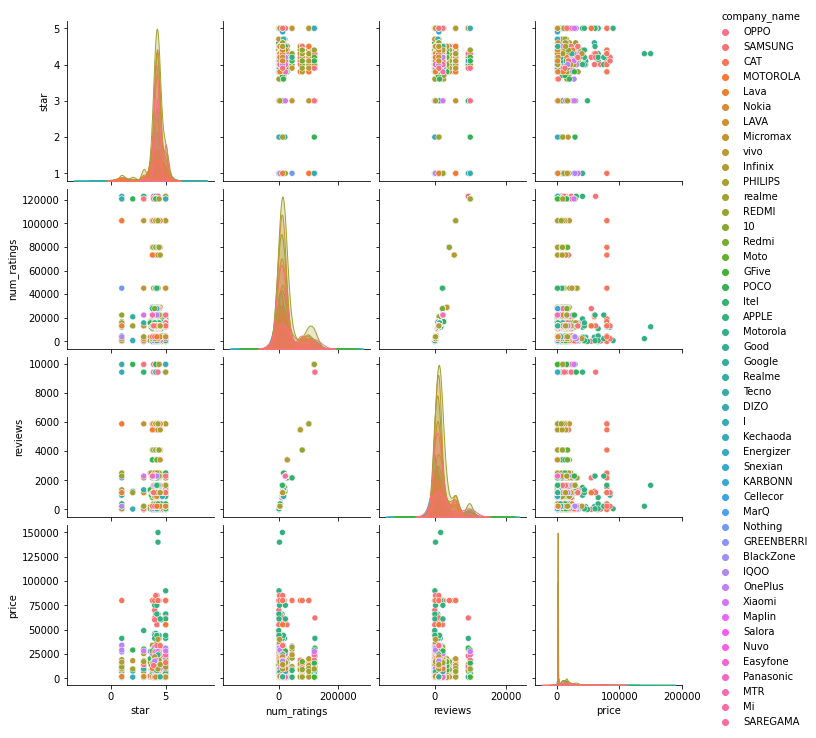

In [29]:
sns.pairplot(data, hue='company_name')

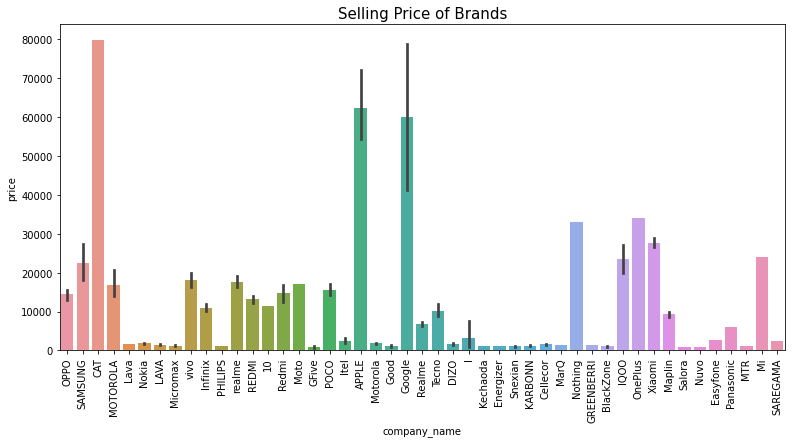

In [30]:
plt.figure(figsize=(13,6))
plt.xticks(rotation=90)
sns.barplot(x=data.company_name, y=data["price"])
plt.title("Selling Price of Brands", size=15)
plt.show()

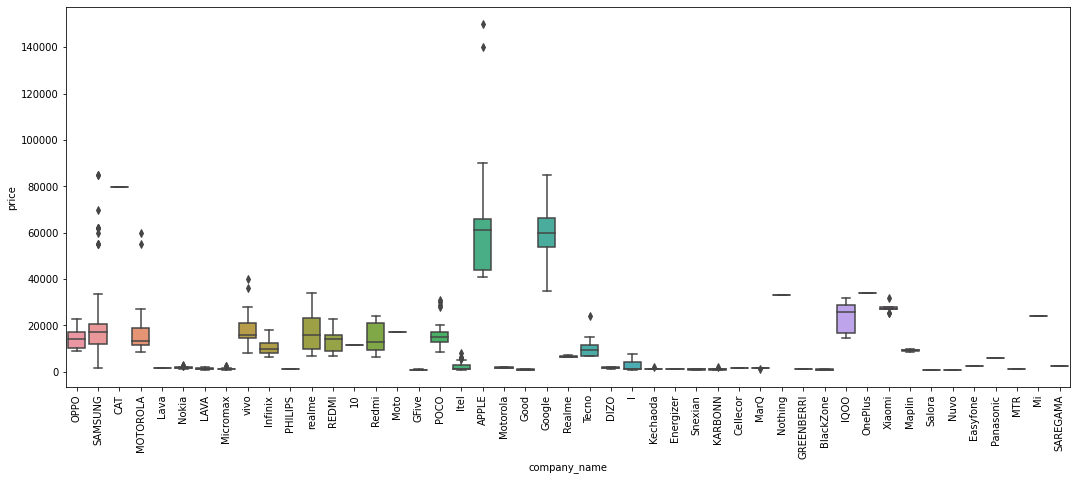

In [31]:
fig, ax = plt.subplots(figsize=(18,7))
plt.xticks(rotation=90)
ax = sns.boxplot(y="price", x="company_name", data=data)

In [32]:
# Brandwise Mean Selling prices
round(data.groupby('company_name')['price'].mean(),0).sort_values(ascending=False)

company_name
CAT           79900.0
APPLE         62238.0
Google        59999.0
OnePlus       33990.0
Nothing       32999.0
Xiaomi        27609.0
Mi            23999.0
IQOO          23432.0
SAMSUNG       22540.0
vivo          18007.0
realme        17625.0
Moto          16999.0
MOTOROLA      16956.0
POCO          15593.0
Redmi         14776.0
OPPO          14391.0
REDMI         13167.0
10            11499.0
Infinix       10962.0
Tecno         10159.0
Maplin         9294.0
Realme         6732.0
Panasonic      5999.0
I              3182.0
Easyfone       2699.0
SAREGAMA       2490.0
Itel           2404.0
Motorola       1841.0
Nokia          1822.0
DIZO           1749.0
Lava           1638.0
Cellecor       1556.0
MarQ           1482.0
LAVA           1451.0
GREENBERRI     1399.0
KARBONN        1251.0
PHILIPS        1239.0
Micromax       1212.0
Kechaoda       1199.0
Good           1124.0
Energizer      1099.0
MTR            1050.0
Snexian        1047.0
BlackZone      1022.0
Salora          899

<BarContainer object of 21 artists>

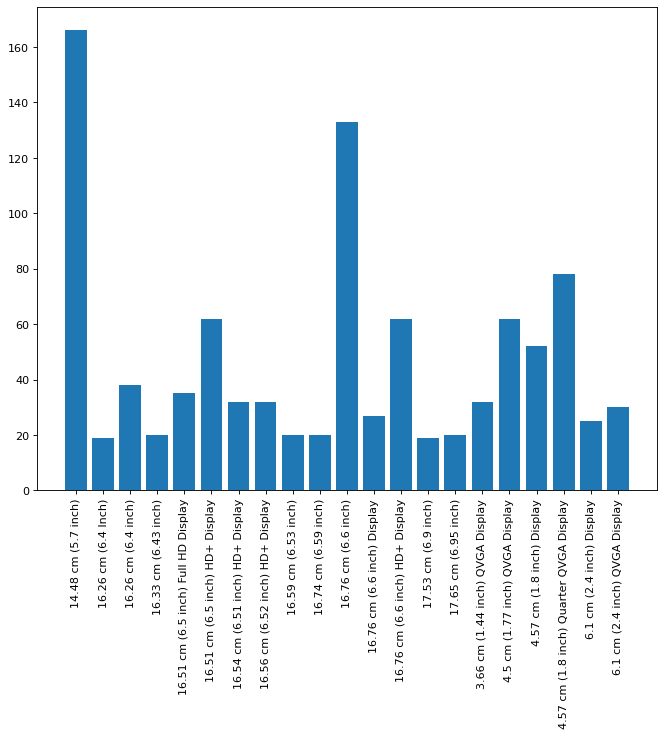

In [33]:
grouped_screen =  data.groupby(['display'],as_index=False).model.count()
figure(figsize=(10, 8), dpi=80)
plt.xticks(rotation=90)
plt.bar(grouped_screen['display'], grouped_screen['model'])

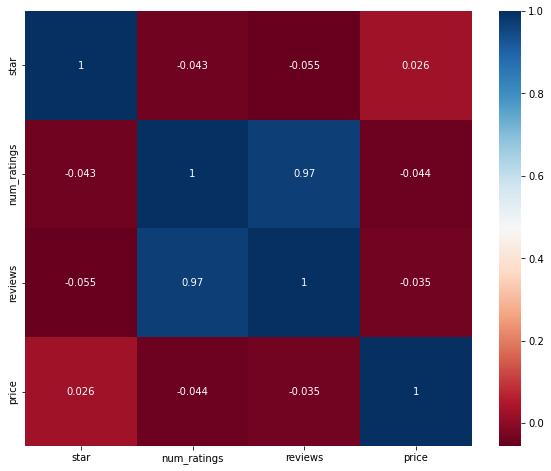

In [34]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap="RdBu")
plt.show()

# -----------------------------------------------------------------------------------------------------------

## Q2

### Identify a list of product recommendations, which contains at least one that the user will start buying as their next selection.

Here we can create a filter based recommendations system so that if you ask for particular price range of product then we can provide top 10 product name and there detail to user that this are peoduct that you can purchase based on reviews ratings and star

for that we can do rivew analysis for particular product as well to make over suggestions mre effective

In [65]:
#!pip install scikit-surprise

In [48]:
from surprise import accuracy
from surprise.model_selection.validation import cross_validate
from surprise.dataset import Dataset
from surprise import SVD
from surprise import KNNBasic
from surprise import KNNWithMeans
reader = Reader()

In [49]:
df = Dataset.load_from_df(data[["model", "star","num_ratings"]],reader)

In [50]:
from surprise.model_selection import train_test_split
trainset,testset = train_test_split(df,test_size = 0.3, random_state =10)

In [57]:
# sim_options ={'name':['msd','cosine','pearson','pearson_baseline'],
#              'min_support':[3,4,5],
#               'user_based':[True]}

# params = {'k':range(30,50,1),'sim_options':sim_options} 
# clf = find_best_model(KNNBasic,params,suprise_data)

In [54]:
svd = SVD()
reader =Reader()
df = Dataset.load_from_df(data[["model", "star","num_ratings"]],reader)

In [55]:
df

In [56]:
cross_validate(svd,df,measures = ['RMSE',"MAE"],cv=5,verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    38642.912440261.569344970.324242581.092239821.715241255.52272255.0550
MAE (testset)     21951.370623754.167526606.654825072.218322841.056124045.09351645.2721
Fit time          0.02    0.01    0.01    0.01    0.01    0.01    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    


{'test_rmse': array([38642.91241743, 40261.56927256, 44970.32424404, 42581.09221817,
        39821.71523158]),
 'test_mae': array([21951.37055838, 23754.16751269, 26606.65482234, 25072.21827411,
        22841.05612245]),
 'fit_time': (0.017001867294311523,
  0.010001182556152344,
  0.007998466491699219,
  0.00800323486328125,
  0.006998538970947266),
 'test_time': (0.0029969215393066406,
  0.0009984970092773438,
  0.0,
  0.0009996891021728516,
  0.0010008811950683594)}

In [58]:
trainset = df.build_full_trainset()

In [59]:
resultant_matrix = svd.fit(trainset)

In [64]:
svd.predict(model='APPLE iPhone 11 (Black, 64 GB)')

TypeError: predict() got an unexpected keyword argument 'model'